In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("../../iPyNotebook/default_colors.mplstyle")

In [3]:
from PIL import Image

In [4]:
# Модуль-обертка над Си-реализацией
import crandom

In [5]:
gen = crandom.Random('xorshift')
gen.set_seed([233, 43, 67])

Random(name='xorshift')

In [6]:
gen = crandom.Random('xorshift+')
print(gen)
gen

name: xorshift+, seeds: None, seeds num: 2


Random(name='xorshift+')

In [6]:
r = gen.generate(size=10)
r

array([       479137,        399058,        265353,        265353,
           977547631,     180617331,     713303526,     180618363,
       2009022366469, 1673959810188], dtype=uint64)

In [7]:
r = gen.generate(size=10, type=float)
r

array([4.86328122e-08, 3.13416441e-08, 2.22314630e-04, 4.10983880e-05,
       6.39450471e-05, 3.15762972e-08, 4.56855882e-01, 3.80608649e-01,
       2.53122379e-01, 2.53060372e-01])

In [8]:
gen.set_iterator(10, int)

Random(name='xorshift+')

In [9]:
for i in gen:
    print(i)

3082001382967855750
1792267475978845061
14231463196636185445
13807153923746116941
5329870505688703097
5111212386094705281
8988596290593245419
175800386593737550
2874318809640216625
8279248524839747840


В соревновании с NumPy проигрываем, если компилировать без оптимизации. Но если применить флаг `-O3`, то начинаем уверенно выигрывать

In [10]:
%timeit np.random.randint(0, (2**64-1), size=10000, dtype=np.uint64)

85.4 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%timeit gen.generate(size=10000)

39.4 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Для примера сгенерируем 400, 2500 и 10000 случайных чисел от 0 до 1. Для рисования квадрата желательно взять такое количество, чтобы оно было полным квадратом. Выберем вначале генератор

In [12]:
R_1 = gen.generate(size=400, type=float)
R_2 = gen.generate(size=2500, type=float)
R_3 = gen.generate(size=10000, type=float)
R_4 = gen.generate(size=1000000, type=float)

In [13]:
R = (R_1, R_2, R_3, R_4)

### Тестирование с помощью вычисления числовых характеристик получившейся последовательности

Получаем числа в интервале $[0, 1)$. В теории математическое ожидание равномерного распределения в интервале $[a, b]$ равно $(a+b)/2 = (0+1)/2 = 1/2$.  https://ru.wikipedia.org/wiki/Непрерывное_равномерное_распределение

Вычислим среднее, вариацию (эмпирическую десперсию). С увеличением количества чисел они должны стремится к теоретическим значениям, причем погрешность будет $1/\sqrt{N}$, где $N$ количество сгенерированных чисел. Поэтому для точности хотя бы $10^{-3}$ нужно сгенерировать $10^6$ чисел. В целом, если с увеличением количества чисел точность растет, то генератор работает правильно.

In [14]:
for r in R:
    print("Среднее для {0} чисел: {1}".format(len(r), np.mean(r)))
    print("Вариация для {0} чисел: {1}".format(len(r), np.var(r)))
    print("Медиана для {0} чисел: {1}".format(len(r), np.median(r)))
    print("")

Среднее для 400 чисел: 0.48855417543702734
Вариация для 400 чисел: 0.0897442624494126
Медиана для 400 чисел: 0.49335830138598874

Среднее для 2500 чисел: 0.49162474134803763
Вариация для 2500 чисел: 0.08428516437278342
Медиана для 2500 чисел: 0.4724778211438677

Среднее для 10000 чисел: 0.5045631750548674
Вариация для 10000 чисел: 0.0834771297137414
Медиана для 10000 чисел: 0.5053838059773825

Среднее для 1000000 чисел: 0.5004632745482802
Вариация для 1000000 чисел: 0.08325240007373799
Медиана для 1000000 чисел: 0.5007372155177557



### Графические методы

Строим гистограмму. С увеличением количества чисел она должна становится все больше похожей на график плотности вероятности. Если с увеличением количества чисел прослеживается тенденция к улучшению, то генератор корректный. Тест позволяет оценить на глаз качество генератора.

Text(0.5,1,'Для $10^{6}$')

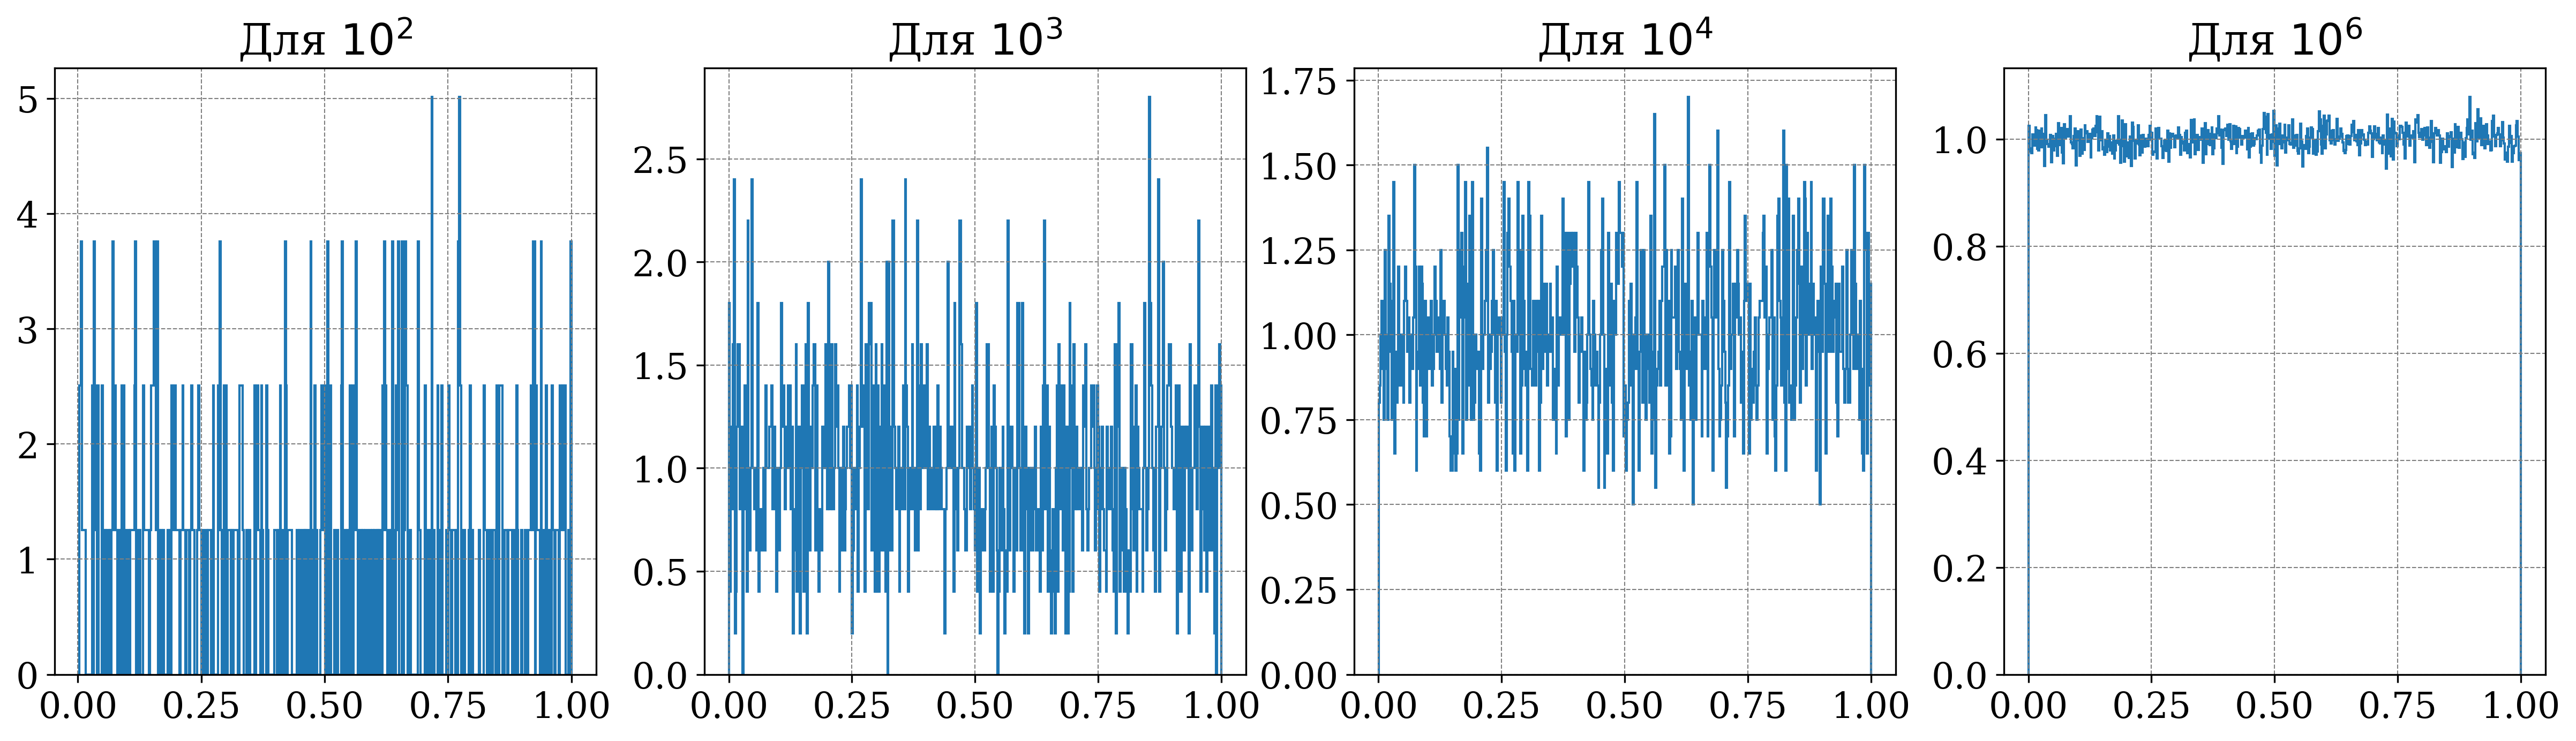

In [15]:
fig01 = plt.figure(1, dpi=300, figsize=(20, 5))

ax011 = fig01.add_subplot(1, 4, 1)
ax012 = fig01.add_subplot(1, 4, 2)
ax013 = fig01.add_subplot(1, 4, 3)
ax014 = fig01.add_subplot(1, 4, 4)

ax011.hist(R_1, bins=500, density=True, histtype='step')
ax012.hist(R_2, bins=500, density=True, histtype='step')
ax013.hist(R_3, bins=500, density=True, histtype='step')
ax014.hist(R_4, bins=500, density=True, histtype='step')

deg = int(np.log10(R_1.size))
ax011.set_title('Для $10^{{{0:d}}}$'.format(deg))
deg = int(np.log10(R_2.size))
ax012.set_title('Для $10^{{{0:d}}}$'.format(deg))
deg = int(np.log10(R_3.size))
ax013.set_title('Для $10^{{{0:d}}}$'.format(deg))
deg = int(np.log10(R_4.size))
ax014.set_title('Для $10^{{{0:d}}}$'.format(deg))

Ошибка длжна убывать пропорционально
$$
\frac{\sigma}{\sqrt{N}}
$$

In [16]:
steps = np.linspace(10000,10000000,1000, dtype=np.int)
means = np.array([np.mean(gen.generate(n, type=float)) for n in steps])
# means = np.array([np.mean(np.random.random(n)) for n in steps])

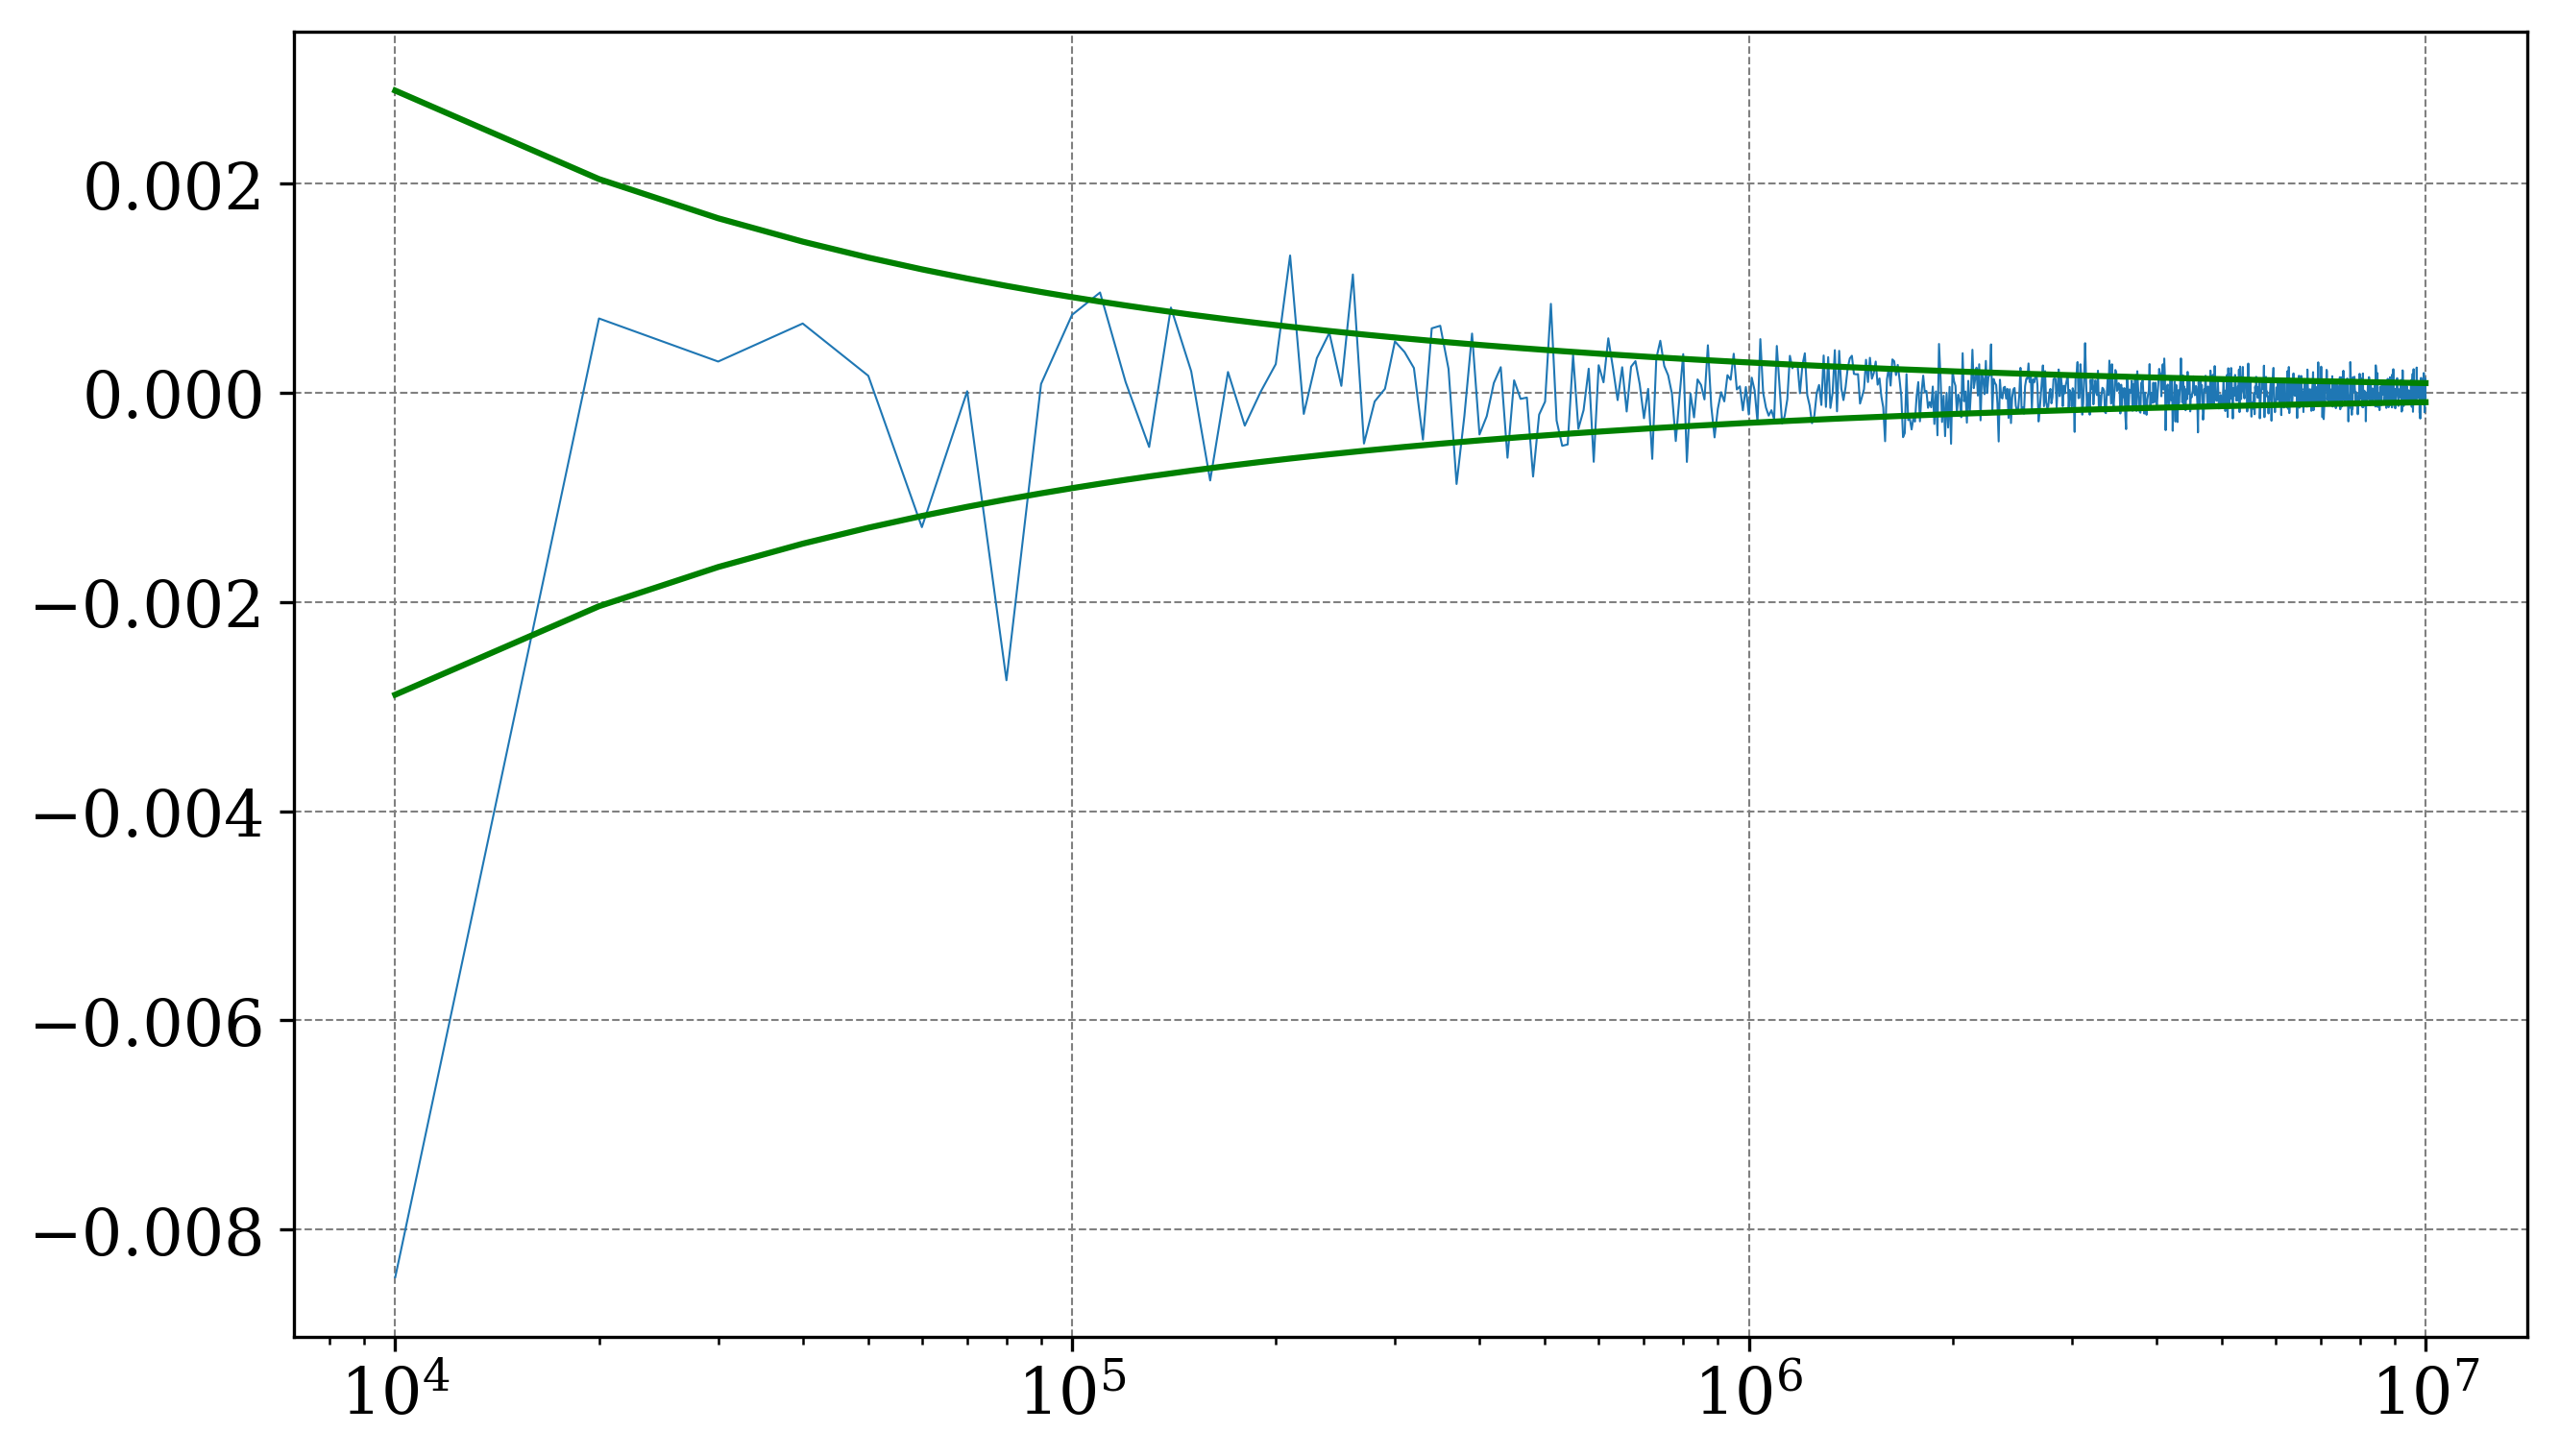

In [17]:
fig02 = plt.figure(2, dpi=300, figsize=(10, 6))
ax02 = fig02.add_subplot(1, 1, 1)
ax02.set_xscale('log')
ax02.plot(steps, means-0.5, lw=0.5)
ax02.plot(steps, 1/np.sqrt(steps)/np.sqrt(12), color='g')
ax02.plot(steps, -1/np.sqrt(steps)/np.sqrt(12), color='g')

Другой метод построить — серый квадрат. Метод еще менее точный и годится для небольшой последовательности. Принцип такой: рисуем пиксели серого квадрата. Каждый пиксель характеризуется числом от 0 до 255 (оттенок серого). Если в результате получается картинка без всякой структуры, то последовательность «хорошая». Если получаются круги, полосы, волны и т.п., то последовательность плохая, т.е. не случайная.

In [18]:
for r in R:
    # Размер картинки в пикселях а х а
    a = int(np.sqrt(r.size))
    # Используем библиотеку Pillow для создания картинки
    img = Image.new('L', (a, a), 255)
    # массив пикселей двумерный и пустой, надо его заполнить
    pixels = img.load()

    rr = r.reshape((a, a))
    for i in range(a):
        for j in range(a):
            pixels[i,j] = int(255 * rr[i, j])

    img.save('img{0}.png'.format(a))

![](img1000.png)